# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.


Attribute Information (in order):

CRIM per capita crime rate by town  
ZN proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS proportion of non-retail business acres per town  
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
NOX nitric oxides concentration (parts per 10 million)  
RM average number of rooms per dwelling  
AGE proportion of owner-occupied units built prior to 1940  
DIS weighted distances to five Boston employment centres  
RAD index of accessibility to radial highways  
TAX full-value property-tax rate per 10,000 dollar.    
PTRATIO pupil-teacher ratio by town    
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town    
LSTAT % lower status of the population    
MEDV Median value of owner-occupied homes in $1000's  

### Import and explore the data. Clean the data for outliers and missing values. 

In [3]:
data = pd.read_csv(r"C:\Users\kim.buchner\Desktop\Ironhack\Module1\WEEK7\DAY5\lab-problems-with-ML\data\boston_data.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


#### Removing outliers
- https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

In [6]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     321 non-null    float64
 1   zn       321 non-null    float64
 2   indus    321 non-null    float64
 3   chas     321 non-null    float64
 4   nox      321 non-null    float64
 5   rm       321 non-null    float64
 6   age      321 non-null    float64
 7   dis      321 non-null    float64
 8   rad      321 non-null    float64
 9   tax      321 non-null    float64
 10  ptratio  321 non-null    float64
 11  black    321 non-null    float64
 12  lstat    321 non-null    float64
 13  medv     321 non-null    float64
dtypes: float64(14)
memory usage: 37.6 KB


### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

In [8]:
data = data.drop(columns=['chas','dis','zn','black','age'])

In [9]:
data.corrwith(data["medv"])

crim      -0.504009
indus     -0.565210
nox       -0.467456
rm         0.712762
rad       -0.425741
tax       -0.535400
ptratio   -0.471788
lstat     -0.754075
medv       1.000000
dtype: float64

In [10]:
data.corrwith(data["rm"])

crim      -0.199660
indus     -0.362448
nox       -0.274451
rm         1.000000
rad       -0.111475
tax       -0.206632
ptratio   -0.232715
lstat     -0.613583
medv       0.712762
dtype: float64

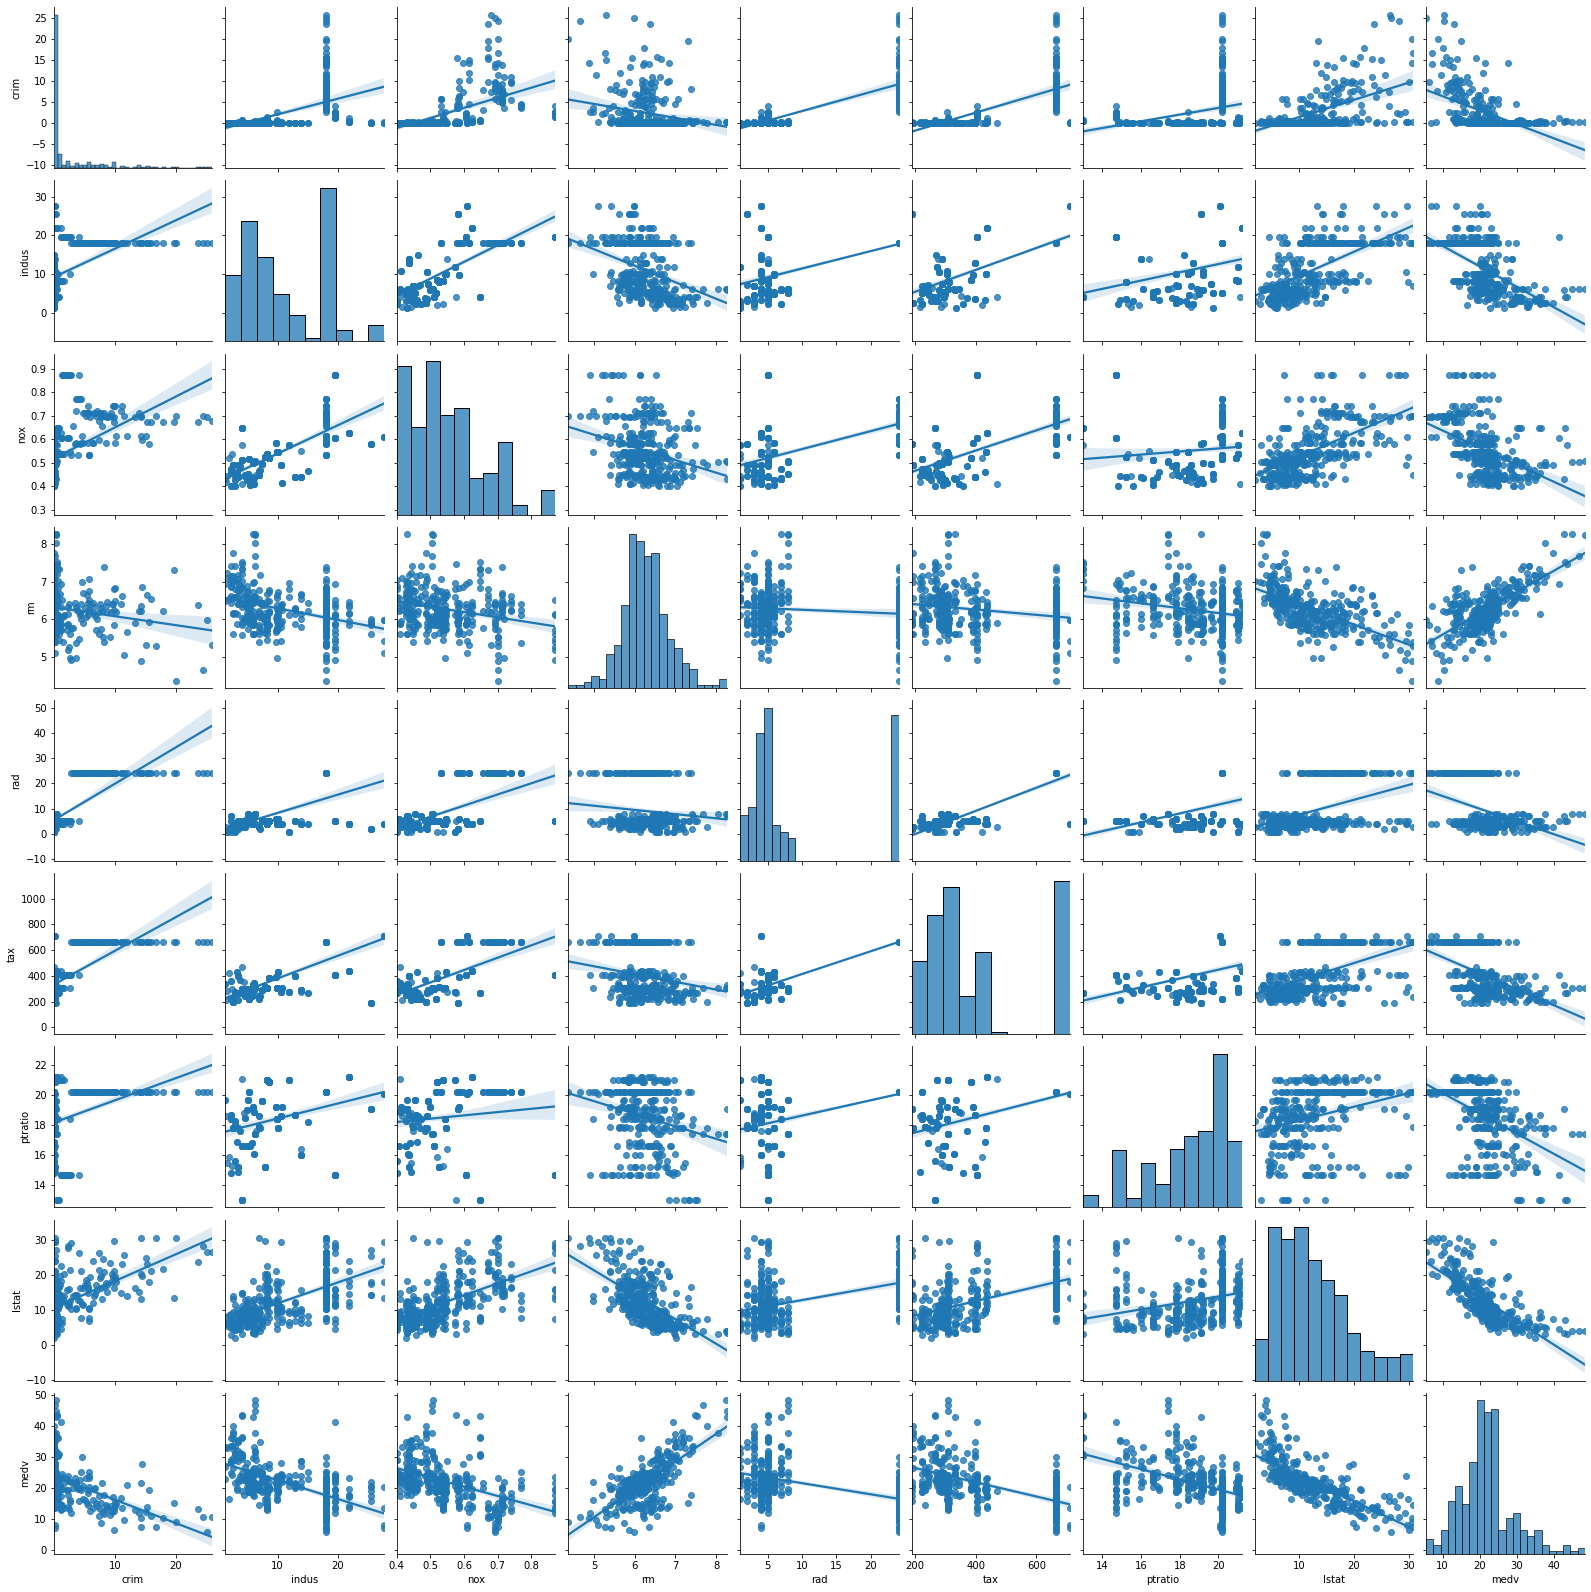

In [11]:
#Adding kind = reg shows the trend line
sns.pairplot(data, kind = 'reg')

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [12]:
#Some variables have a clear correlation to each other, mainly seen with medv(=price)

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

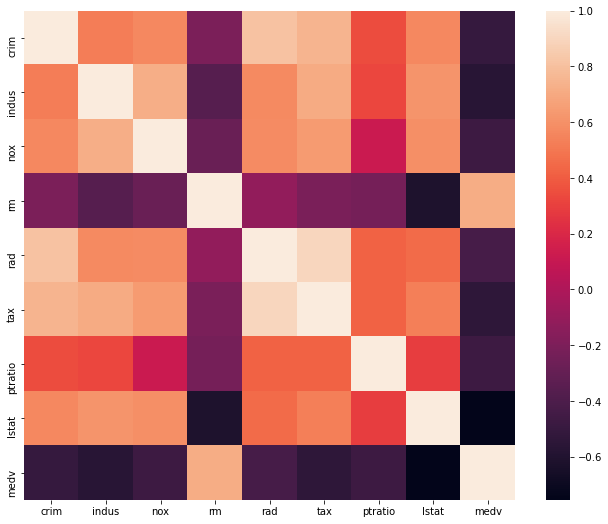

In [13]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(data.corr())

Other variables that are highly correlated:  
- crim and tax

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [14]:
data["medv"].describe()

count    321.000000
mean      21.783489
std        7.122202
min        5.600000
25%       17.800000
50%       21.200000
75%       24.600000
max       48.300000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [15]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    #Calculates and returns the performance score between 
    #true and predicted values based on the metric chosen
    
    R = r2_score(y_true, y_predict)
    
    return R

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [16]:
from sklearn.model_selection import train_test_split

X = data.drop("medv",axis=1)
y = data["medv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [18]:
from sklearn.ensemble import RandomForestRegressor 

In [19]:
parameter = [2,4,6,8,10]

In [20]:
train_test = []
test = []

for p in parameter:
    model = RandomForestRegressor(max_depth=p, random_state=0)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    r2_train = r2_score(y_train,y_pred_train)
    r2_test = r2_score(y_test,y_pred_test)

    train_test.append(r2_train)
    test.append(r2_test)

Now, plot the score for each tree on the training set and on the testing set.

<AxesSubplot:>

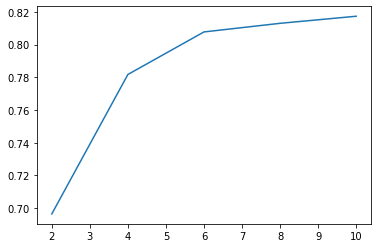

In [22]:
sns.lineplot(x=parameter, y=test)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [23]:
#The higher the number of the max_depth, the higher the R2 score. Keep in mind a high number of max_depth can lead to
#overfitting! You can see the curve flatten after max_depth = 6

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
#When the model has a high depth, it can suffer from over fitting > high bias
#depht = 1, high variance

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

- Not very relevant since a lot of features of the dataset (criminality, industrial zone, accessibility to radial highways),   if not all of them, have changed significantly
- I don't think so, there is not a lot of information about a house itself but more the surroundings and neighborhood its in  
- No, not for today and see point above
- Probably not, depends on the cities, but generally there are many differences between the areas. That means that it doesn't   make sense to apply the same data on an area with a different distribution of (maybe even different) features.